### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
sns.set()

### Data Wrangling

#### Load the data


In [2]:
df=pd.read_csv('data.csv')
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


#### Assessing Data

- no null values

#### Acleaning Data

- no cleaning is needed

In [4]:
df_scaled=preprocessing.scale(df)

In [5]:
cols=df.columns.values

array([[<AxesSubplot:title={'center':'Satisfaction'}>,
        <AxesSubplot:title={'center':'Loyalty'}>]], dtype=object)

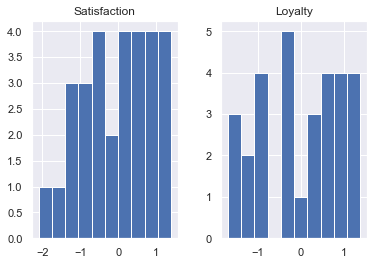

In [6]:
df_scaled=pd.DataFrame(data=df_scaled,columns=cols)
df_scaled.hist()

Text(0.5, 1.0, 'Market segmentation')

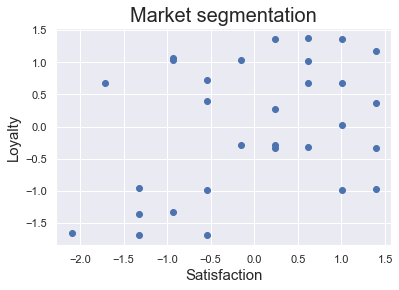

In [7]:
plt.scatter(df_scaled['Satisfaction'],df_scaled['Loyalty'])
plt.xlabel('Satisfaction',size=15)
plt.ylabel('Loyalty',size=15)
plt.title('Market segmentation',size=20)

### clustring

start with kmean = 2

In [8]:
df_copy=df_scaled.copy()

In [9]:
clust=KMeans(2)

In [10]:
df_copy['Cluset']=clust.fit_predict(df_copy)

Text(0.5, 1.0, 'Market segmentation')

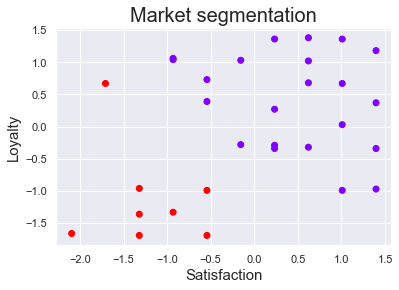

In [11]:
plt.scatter(df_copy['Satisfaction'],df_copy['Loyalty'],c=df_copy['Cluset'],cmap='rainbow')
plt.xlabel('Satisfaction',size=15)
plt.ylabel('Loyalty',size=15)
plt.title('Market segmentation',size=20)

- we can see ,data must cluster more than two clusters

- we will use elbow method to identify the right number of clusters

In [12]:
df_with_cluster=df_scaled.copy()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'The elbow method')

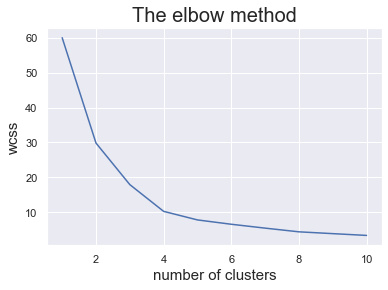

In [13]:
wcss=[]
no_of_clusters=np.arange(1,11)
for i in no_of_clusters:
    clust=KMeans(i)
    clust.fit(df_with_cluster)
    wcss.append(clust.inertia_)
plt.plot(no_of_clusters,wcss)
plt.xlabel('number of clusters',size=15)
plt.ylabel('wcss',size=15)
plt.title('The elbow method',size=20)
    

- The elbow method shows that the best KMeans of 4 clustering

In [14]:
clust=KMeans(4)
clust.fit(df_with_cluster)

KMeans(n_clusters=4)

In [15]:
df_with_cluster['Cluster']=clust.predict(df_with_cluster)

Text(0.5, 1.0, 'Market segmentation')

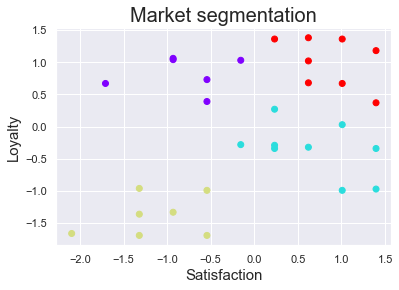

In [16]:
plt.scatter(df_with_cluster['Satisfaction'],df_with_cluster['Loyalty'],c=df_with_cluster['Cluster'],cmap='rainbow')
plt.xlabel('Satisfaction',size=15)
plt.ylabel('Loyalty',size=15)
plt.title('Market segmentation',size=20)

### Results:

- we have 4 clusters for customers:
    - first one with low loyalty and low satisfaction "alienated" , we can not do any thing to make the increase visites or purchase.
    - second customers with high loyalty and low satisfaction "supportters" , need someactions to increase satisfaction like decreasing the time of waiting on cashiers, with add multiple cashiers, and so on, to reach them to be fans.
    - third one low loyalty and high satisfaction ,they are romars and w, can increase loyalty with loyalty cards and discounts, to reach with them to be fans
    - the last one are fans .